In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
# hit "shift + Enter" to execute this cell
# loading some basic functions needed for the game
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, BasicAer
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from ipywidgets import interact

In [3]:
# hit "shift + Enter" to execute this cell
# auxillary functions for the coin moves

def MoveA1(move_A1): global moveA1; moveA1=move_A1;
def MoveB1(move_B1): global moveB1; moveB1=move_B1;
def MoveA2(move_A2): global moveA2; moveA2=move_A2;

In [4]:
# hit "shift + Enter" to execute this cell
# auxillary function to identify the winner

def who_wins(counts):
    if len(counts)==1 :
        print('The winner is', 'A' if ("0" in counts) else 'B')
    else:
        count0=counts["0"]
        count1=counts["1"]
        print('The coin is in superposition of |0⟩ and |1⟩')
        print('A wins with probability',  "%.1f%%" % (100.*count0/(count0+count1)))
        print('B wins with probability',  "%.1f%%" % (100.*count1/(count0+count1)))
    return()

In [5]:
# hit "shift + Enter" to execute this cell
# then make your choice using the drop-down widget
interact(MoveA1, move_A1={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_A1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

In [6]:
# hit "shift + Enter" to execute this cell 
# you might need to click the cell, first, to activate it
# then make your choice using the drop-down widget
interact(MoveB1, move_B1={'id Gate':0,'X Gate':1});


interactive(children=(Dropdown(description='move_B1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

In [7]:
# hit "shift + Enter" to execute this cell
# you might need to click the cell, first, to activate it
# then make your choice using the drop-down widget
interact(MoveA2, move_A2={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_A2', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

In [8]:
# optional: print the three moves. 
# 0: id Gate (leave the coin unchanged), 1: X Gate (turn the coin)
print(moveA1, moveB1, moveA2)

1 1 0


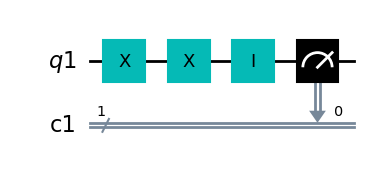

In [10]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend

# 1. move of A
qc.id(q[0]) if (moveA1 == 0) else qc.x(q[0]) 
    
# 1. move of B 
qc.id(q[0]) if (moveB1 == 0) else qc.x(q[0])      

# 2. move of A
qc.id(q[0]) if (moveA2 == 0) else qc.x(q[0]) 
    
qc.measure(q, c) # Measure the qubits
qc.draw(output='mpl') # plot the circuit

In [11]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner

{'0': 200}
The winner is A


In [12]:
interact(MoveA1, move_A1={'id Gate':0,'X Gate':1, 'H Gate':2});

interactive(children=(Dropdown(description='move_A1', options={'id Gate': 0, 'X Gate': 1, 'H Gate': 2}, value=…

In [13]:
interact(MoveB1, move_B1={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_B1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

In [14]:
interact(MoveA2, move_A2={'id Gate':0,'X Gate':1, 'H Gate':2});

interactive(children=(Dropdown(description='move_A2', options={'id Gate': 0, 'X Gate': 1, 'H Gate': 2}, value=…

In [15]:
# optional: print the three moves. 
# 0: id Gate (leave the coin unchanged), 1: X Gate (turn the coin), 2: H Gate
print(moveA1, moveB1, moveA2)

2 0 0


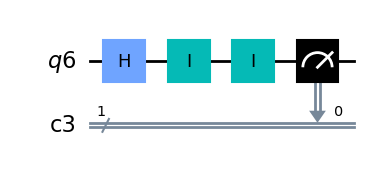

In [17]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend

# 1. move of A
if   moveA1 == 0 : qc.id(q[0])
elif moveA1 == 1 : qc.x(q[0]) 
elif moveA1 == 2 : qc.h(q[0]) 
    
# 1. move of B 
if   moveB1 == 0 : qc.id(q[0])
elif moveB1 == 1 : qc.x(q[0])     

# 2. move of A
if   moveA2 == 0 : qc.id(q[0])
elif moveA2 == 1 : qc.x(q[0]) 
elif moveA2 == 2 : qc.h(q[0]) 

qc.measure(q, c) # Measure the qubits
qc.draw(output='mpl') # plot the circuit

{'1': 111, '0': 89}
The coin is in superposition of |0⟩ and |1⟩
A wins with probability 44.5%
B wins with probability 55.5%


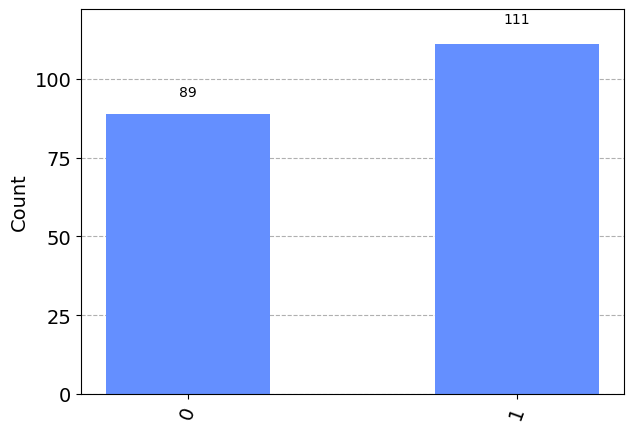

In [18]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner

plot_histogram(counts) # Visualise the results

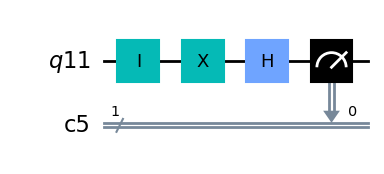

In [20]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend


# define the quantum gates (=coin moves) as you like
# you could also try change the number of moves to just 1 or 2
#qc.iden(q[0])
#qc.x(q[0]) 
#qc.h(q[0]) 

qc.id(q[0])
qc.x(q[0]) 
qc.h(q[0])

qc.measure(q, c) # Measure the qubits
qc.draw(output='mpl') # plot the circuit

{'0': 94, '1': 106}


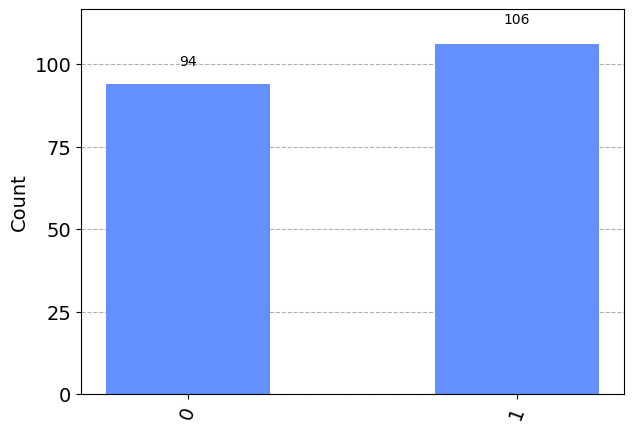

In [21]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs

plot_histogram(counts) # Visualise the results